In [1]:
!nvidia-smi

Tue May 21 01:06:59 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:07:00.0 Off |                    0 |
| N/A   29C    P0    56W / 400W |   5640MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  Off  | 00000000:0A:00.0 Off |                    0 |
| N/A   

In [2]:
import torch


# Function to list available GPUs and select one
def select_device():
    if torch.cuda.is_available():
        print("Available GPUs:")
        for i in range(torch.cuda.device_count()):
            print(f"{i}: {torch.cuda.get_device_name(i)}")
        device_id = int(input("Select GPU by entering the device ID (default 0): ") or 0)
        if device_id < torch.cuda.device_count():
            print(f"Using GPU: {torch.cuda.get_device_name(device_id)}")
            return torch.device(f"cuda:{device_id}")
        else:
            print(f"Invalid device ID. Using GPU: {torch.cuda.get_device_name(0)}")
            return torch.device("cuda:0")
    else:
        print("No GPU available. Using CPU.")
        return torch.device("cpu")

# Select the device
device = select_device()

Available GPUs:
0: NVIDIA A100-SXM4-40GB
1: NVIDIA A100-SXM4-40GB
2: NVIDIA A100-SXM4-40GB
3: NVIDIA A100-SXM4-40GB
4: NVIDIA A100-SXM4-40GB
5: NVIDIA A100-SXM4-40GB
6: NVIDIA A100-SXM4-40GB
7: NVIDIA A100-SXM4-40GB
Select GPU by entering the device ID (default 0): 0
Using GPU: NVIDIA A100-SXM4-40GB


In [3]:
from transformers import AlbertForSequenceClassification, AlbertTokenizer
from torch.utils.data import DataLoader, Dataset
import torch

# Define the model and tokenizer for ALBERT xxlarge version 2
model_name = "albert-xlarge-v2"
tokenizer = AlbertTokenizer.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 labels for the task


/opt/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-xlarge-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
import pandas as pd

# SNLI train dataset

df_snli_train = pd.read_csv('SNLI/snli_1.0_train.csv')

In [5]:
df_snli_train

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550147,contradiction,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( four kids ) ( ( won awards ) ( ( ( for ` )...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (NP (CD four) (NNS kids)) (VP (VBD wo...,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',2267923837.jpg#3,2267923837.jpg#3r1c,contradiction,NaN,NaN,NaN,NaN
550148,neutral,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( ( ( ( ( four ( homeless children ) ) ( had...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (S (NP (CD four) (JJ homeless) (NNS c...,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",2267923837.jpg#3,2267923837.jpg#3r1n,neutral,NaN,NaN,NaN,NaN
550149,neutral,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a bodysuit ) ) ) ( ( is (...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,7979219683.jpg#2,7979219683.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
550150,contradiction,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a ( business suit ) ) ) )...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,7979219683.jpg#2,7979219683.jpg#2r1c,contradiction,NaN,NaN,NaN,NaN


In [6]:
df_snli_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550152 entries, 0 to 550151
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   gold_label              550152 non-null  object
 1   sentence1_binary_parse  550152 non-null  object
 2   sentence2_binary_parse  550146 non-null  object
 3   sentence1_parse         550152 non-null  object
 4   sentence2_parse         550152 non-null  object
 5   sentence1               550152 non-null  object
 6   sentence2               550146 non-null  object
 7   captionID               550152 non-null  object
 8   pairID                  550152 non-null  object
 9   label1                  550152 non-null  object
 10  label2                  39370 non-null   object
 11  label3                  39395 non-null   object
 12  label4                  39383 non-null   object
 13  label5                  36914 non-null   object
dtypes: object(14)
memory usage: 58.8+ MB

In [7]:
# SNLI test dataset

df_snli_test = pd.read_csv('SNLI/snli_1.0_test.csv')

In [8]:
df_snli_test

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( has ( cracks ( in ( the c...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ ha...,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,2677109430.jpg#1,2677109430.jpg#1r1n,neutral,contradiction,contradiction,neutral,neutral
1,entailment,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( is ( filled ( with song )...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ is...,This church choir sings to the masses as they ...,The church is filled with song.,2677109430.jpg#1,2677109430.jpg#1r1e,entailment,entailment,entailment,neutral,entailment
2,contradiction,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( ( A choir ) ( singing ( at ( a ( baseball ...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (NP (NP (DT A) (NN choir)) (VP (VBG sing...,This church choir sings to the masses as they ...,A choir singing at a baseball game.,2677109430.jpg#1,2677109430.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
3,neutral,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is young ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is young.,6160193920.jpg#4,6160193920.jpg#4r1n,neutral,neutral,neutral,neutral,neutral
4,entailment,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is ( very happy ) ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,6160193920.jpg#4,6160193920.jpg#4r1e,entailment,entailment,contradiction,entailment,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,contradiction,( ( Two women ) ( ( are ( ( observing somethin...,( ( ( Two women ) ( are ( standing ( with ( th...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (NP (CD Two) (NNS women)) (SBAR (...,Two women are observing something together.,Two women are standing with their eyes closed.,4378810163.jpg#4,4378810163.jpg#4r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9996,entailment,( ( Two women ) ( ( are ( ( observing somethin...,( ( Two girls ) ( ( are ( looking ( at somethi...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (CD Two) (NNS girls)) (VP (VBP ar...,Two women are observing something together.,Two girls are looking at something.,4378810163.jpg#4,4378810163.jpg#4r1e,entailment,entailment,entailment,contradiction,entailment
9997,contradiction,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( flying ( a kite ) ) ) . ) ),(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is flying a kite.,152881593.jpg#1,152881593.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9998,entailment,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( speaking ( in ( a classro...,(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is speaking in a classroom.,152881593.jpg#1,152881593.jpg#1r1e,entailment,entailment,entailment,neutral,entailment


In [9]:
df_snli_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gold_label              10000 non-null  object
 1   sentence1_binary_parse  10000 non-null  object
 2   sentence2_binary_parse  10000 non-null  object
 3   sentence1_parse         10000 non-null  object
 4   sentence2_parse         10000 non-null  object
 5   sentence1               10000 non-null  object
 6   sentence2               10000 non-null  object
 7   captionID               10000 non-null  object
 8   pairID                  10000 non-null  object
 9   label1                  10000 non-null  object
 10  label2                  10000 non-null  object
 11  label3                  10000 non-null  object
 12  label4                  10000 non-null  object
 13  label5                  9990 non-null   object
dtypes: object(14)
memory usage: 1.1+ MB


In [10]:
# Step 1: Load and preprocess the data
def load_and_preprocess_data(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Select only the required columns
    df = df[['sentence1', 'sentence2', 'gold_label']]
    
    # Convert sentences to lowercase to standardize the text
    df['sentence1'] = df['sentence1'].str.lower()
    df['sentence2'] = df['sentence2'].str.lower()
    
    # Mapping labels to integers
    label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}
    df['gold_label'] = df['gold_label'].map(label_mapping)
    
    # Drop rows with any missing values in these columns
    df.dropna(subset=['sentence1', 'sentence2', 'gold_label'], inplace=True)
    
    # Ensure the gold_label column is of type integer
    df['gold_label'] = df['gold_label'].astype(int)
    
    return df

# File paths
train_path = 'SNLI/snli_1.0_train.csv'
dev_path = 'SNLI/snli_1.0_dev.csv'

# Load and preprocess the training and development datasets
df_snli_train = load_and_preprocess_data(train_path)
df_snli_dev = load_and_preprocess_data(dev_path)

# Display the first few rows of the training data to verify
print(df_snli_train.head())


                                           sentence1  \
0  a person on a horse jumps over a broken down a...   
1  a person on a horse jumps over a broken down a...   
2  a person on a horse jumps over a broken down a...   
3              children smiling and waving at camera   
4              children smiling and waving at camera   

                                           sentence2  gold_label  
0  a person is training his horse for a competition.           1  
1      a person is at a diner, ordering an omelette.           2  
2                  a person is outdoors, on a horse.           0  
3                  they are smiling at their parents           1  
4                         there are children present           0  


In [11]:
df_snli_dev.head()

,sentence1,sentence2,gold_label
0,two women are embracing while holding to go pa...,the sisters are hugging goodbye while holding ...,1
1,two women are embracing while holding to go pa...,two woman are holding packages.,0
2,two women are embracing while holding to go pa...,the men are fighting outside a deli.,2
3,"two young children in blue jerseys, one with t...",two kids in numbered jerseys wash their hands.,0
4,"two young children in blue jerseys, one with t...",two kids at a ballgame wash their hands.,1


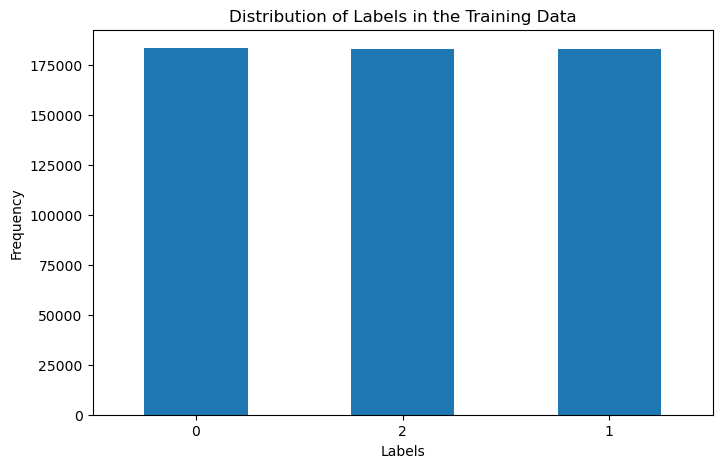

In [12]:
import matplotlib.pyplot as plt

# Plotting the distribution of labels
label_counts = df_snli_train['gold_label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels in the Training Data')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

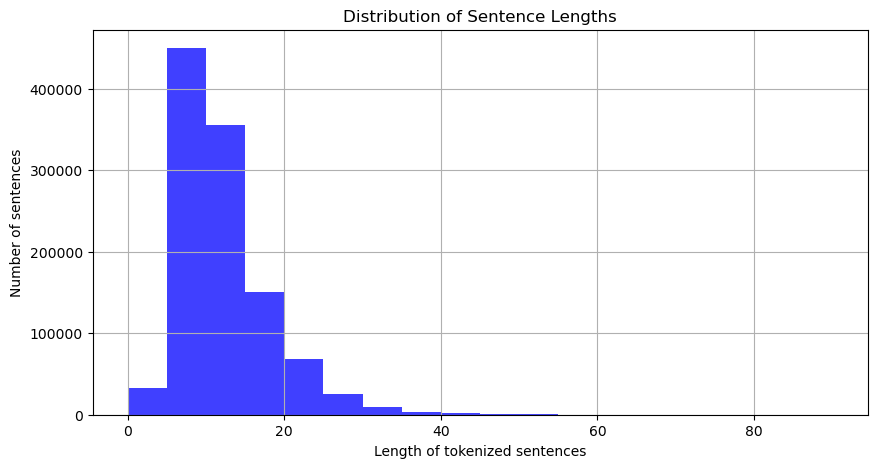

In [13]:
import matplotlib.pyplot as plt

# Function to calculate the length of tokenized sentences
def calculate_lengths(tokenizer, sentences):
    lengths = []
    for sentence in sentences:
        # Tokenize and count the number of tokens
        tokens = tokenizer.tokenize(sentence)
        lengths.append(len(tokens))
    return lengths

# Concatenate the sentences from both fields for a more comprehensive overview
all_sentences = df_snli_train['sentence1'].tolist() + df_snli_train['sentence2'].tolist()

# Calculate lengths
lengths = calculate_lengths(tokenizer, all_sentences)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=range(0, max(lengths) + 10, 5), alpha=0.75, color='blue')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of tokenized sentences')
plt.ylabel('Number of sentences')
plt.grid(True)
plt.show()


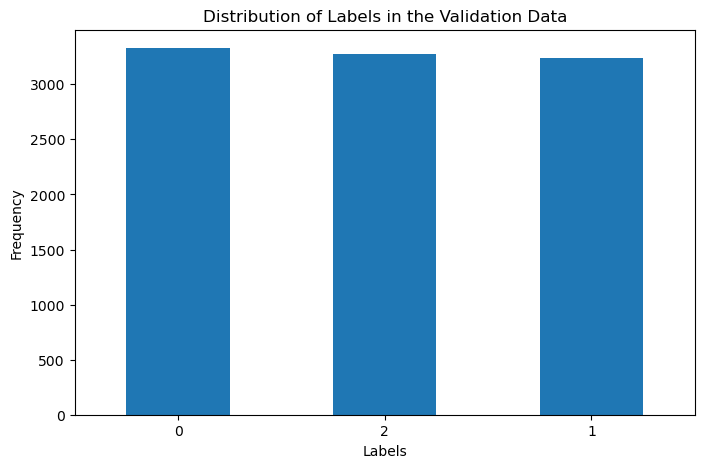

In [14]:
# Optional: Plot distribution of labels to check balance
import matplotlib.pyplot as plt
label_counts = df_snli_dev['gold_label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels in the Validation Data')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [15]:
import logging

logging.disable(logging.WARNING)



def tokenize_and_prepare_inputs(df, tokenizer, max_length=45):
    # Tokenize, pad and create attention masks
    # 'max_length' is a parameter you can tune depending on the maximum length you observed in your dataset analysis
    tokenized_inputs = tokenizer(
        df['sentence1'].tolist(),
        df['sentence2'].tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )
    
    # Extracting input_ids and attention masks from the tokenized inputs
    input_ids = tokenized_inputs['input_ids']
    attention_masks = tokenized_inputs['attention_mask']
    
    return input_ids, attention_masks

# Tokenize training data
train_input_ids, train_attention_masks = tokenize_and_prepare_inputs(df_snli_train, tokenizer)

# Tokenize validation data
validation_input_ids, validation_attention_masks = tokenize_and_prepare_inputs(df_snli_dev, tokenizer)

# Convert labels to tensors
train_labels = torch.tensor(df_snli_train['gold_label'].values)
validation_labels = torch.tensor(df_snli_dev['gold_label'].values)

# Print some details to verify everything is as expected
print("Training input IDs shape:", train_input_ids.shape)
print("Validation input IDs shape:", validation_input_ids.shape)
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", validation_labels.shape)


Training input IDs shape: torch.Size([549361, 45])
Validation input IDs shape: torch.Size([9842, 45])
Training labels shape: torch.Size([549361])
Validation labels shape: torch.Size([9842])


In [16]:
from torch.utils.data import Dataset, DataLoader

class SNLIDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        item = {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }
        return item

    
train_dataset = SNLIDataset(train_input_ids, train_attention_masks, train_labels)
validation_dataset = SNLIDataset(validation_input_ids, validation_attention_masks, validation_labels)

batch_size = 32  # Adjust based on your GPU memory

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


In [17]:
import torch
from torch.optim import AdamW 
from torch.optim.lr_scheduler import CyclicLR
from tqdm.auto import tqdm




model.to(device)

# Optimizer setup
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-6)

# CLR Scheduler setup (Ensure only one scheduler setup is active)
scheduler = CyclicLR(optimizer, base_lr=5e-6, max_lr=1e-5, 
                     step_size_up=len(train_loader)//2, step_size_down=len(train_loader)//2,
                     mode='triangular', cycle_momentum=False)

# Training and validation functions
def train_model(model, train_loader, validation_loader, optimizer, scheduler, epochs=3, save_path='model_snapshots'):
    steps_per_epoch = len(train_loader)
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch')

        for batch_index, batch in enumerate(progress_bar):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()  # Update the learning rate after each batch

            train_loss += loss.item()
            _, predicted = torch.max(logits, dim=1)
            correct += (predicted == batch['labels']).sum().item()
            total += batch['labels'].size(0)
            accuracy = 100. * correct / total
            lr = scheduler.get_last_lr()[0]

            progress_bar.set_postfix(loss=train_loss/(batch_index + 1), accuracy=f'{accuracy:.2f}%', lr=f'{lr:.6f}')

            # Save snapshot at the end of each cycle
            current_step = epoch * steps_per_epoch + batch_index
            if (current_step + 1) % scheduler.total_size == 0:
                torch.save(model.state_dict(), f'{save_path}/albert_xlarge_cycle_{current_step + 1}.pth')
                print(f"Snapshot saved at step {current_step + 1}")

        validate_model(model, validation_loader, device)

def validate_model(model, validation_loader, device):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(validation_loader, desc='Validating', leave=False, unit='batch'):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            val_loss += loss.item()
            _, predicted = torch.max(logits, dim=1)
            correct += (predicted == batch['labels']).sum().item()
            total += batch['labels'].size(0)

    val_accuracy = 100. * correct / total
    print(f'\nValidation Loss: {val_loss / len(validation_loader):.4f} | Validation Accuracy: {val_accuracy:.2f}%')

# Start training
train_model(model, train_loader, validation_loader, optimizer, scheduler, epochs=5, save_path='/storage/data/st1070263')

Epoch 1/5:   0%|          | 0/17168 [00:00<?, ?batch/s]

Snapshot saved at step 17168


Validating:   0%|          | 0/308 [00:00<?, ?batch/s]


Validation Loss: 0.2532 | Validation Accuracy: 91.10%


Epoch 2/5:   0%|          | 0/17168 [00:00<?, ?batch/s]

Snapshot saved at step 34336


Validating:   0%|          | 0/308 [00:00<?, ?batch/s]


Validation Loss: 0.2330 | Validation Accuracy: 91.88%


Epoch 3/5:   0%|          | 0/17168 [00:00<?, ?batch/s]

Snapshot saved at step 51504


Validating:   0%|          | 0/308 [00:00<?, ?batch/s]


Validation Loss: 0.2368 | Validation Accuracy: 91.96%


Epoch 4/5:   0%|          | 0/17168 [00:00<?, ?batch/s]

Snapshot saved at step 68672


Validating:   0%|          | 0/308 [00:00<?, ?batch/s]


Validation Loss: 0.2593 | Validation Accuracy: 91.59%


Epoch 5/5:   0%|          | 0/17168 [00:00<?, ?batch/s]

Snapshot saved at step 85840


Validating:   0%|          | 0/308 [00:00<?, ?batch/s]


Validation Loss: 0.2938 | Validation Accuracy: 91.27%
